DATASET AWAL


In [ ]:
import pandas as pd
df = pd.read_csv('Luas Panen, Produksi, dan Produktivitas Padi Menurut Provinsi, 2024.csv', header=None)
df.head()

,0,1,2,3
0,38 Provinsi,NaN,NaN,NaN
1,NaN,"Luas Panen, Produksi, dan Produktivitas Padi M...",NaN,NaN
2,NaN,Luas Panen (ha),Produktivitas (ku/ha),Produksi (ton)
3,NaN,2024,2024,2024
4,ACEH,301196.35,55.11,1659966.28


PREPROCESSING

In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv('Luas Panen, Produksi, dan Produktivitas Padi Menurut Provinsi, 2024.csv', header=None)
df.columns = ['Nama_Provinsi', 'Luas Panen (ha)', 'Produktivitas (ku/ha)', 'Produksi (ton)']
df.drop(index=[0, 1, 3], inplace=True)
df.reset_index(drop=True, inplace=True)
df.replace('-', np.nan, inplace=True)
print(df.isnull().sum())
df.dropna(inplace=True)
df.to_csv('Luas Panen, Produksi, dan Produktivitas Padi Menurut Provinsi, 2024 (1)_praprocessing.csv', index=False)
print(df.isnull().sum())
print(df.head())



Nama_Provinsi            1
Luas Panen (ha)          0
Produktivitas (ku/ha)    0
Produksi (ton)           0
dtype: int64
Nama_Provinsi            0
Luas Panen (ha)          0
Produktivitas (ku/ha)    0
Produksi (ton)           0
dtype: int64
    Nama_Provinsi Luas Panen (ha) Produktivitas (ku/ha) Produksi (ton)
1            ACEH       301196.35                 55.11     1659966.28
2  SUMATERA UTARA       419463.48                 52.56     2204875.51
3  SUMATERA BARAT       295278.98                 45.94     1356467.93
4            RIAU        56421.96                 39.36      222055.71
5           JAMBI        61625.68                  45.6      281022.05


Normalisasi

In [13]:

for col in ['Luas Panen (ha)', 'Produktivitas (ku/ha)', 'Produksi (ton)']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=['Luas Panen (ha)', 'Produktivitas (ku/ha)', 'Produksi (ton)'], inplace=True)
for col in ['Luas Panen (ha)', 'Produktivitas (ku/ha)', 'Produksi (ton)']:
    min_val = df[col].min()
    max_val = df[col].max()
    df[col] = (df[col] - min_val) / (max_val - min_val)

print(df.head())


    Nama_Provinsi  Luas Panen (ha)  Produktivitas (ku/ha)  Produksi (ton)
1            ACEH         0.186265               0.821866        0.179056
2  SUMATERA UTARA         0.259406               0.747522        0.237836
3  SUMATERA BARAT         0.182606               0.554519        0.146318
4            RIAU         0.034888               0.362682        0.023949
5           JAMBI         0.038106               0.544606        0.030309


Analisa Deskriptif

Statistik Data Produksi Padi 2024:
       Luas Panen (ha)  Produktivitas (ku/ha)  Produksi (ton)
count        38.000000              38.000000       38.000000
mean          0.163492               0.533482        0.150851
std           0.264951               0.246668        0.264754
min           0.000000               0.000000        0.000000
25%           0.012139               0.405175        0.008722
50%           0.049518               0.549563        0.036942
75%           0.180509               0.712391        0.154161
max           1.000000               1.000000        1.000000


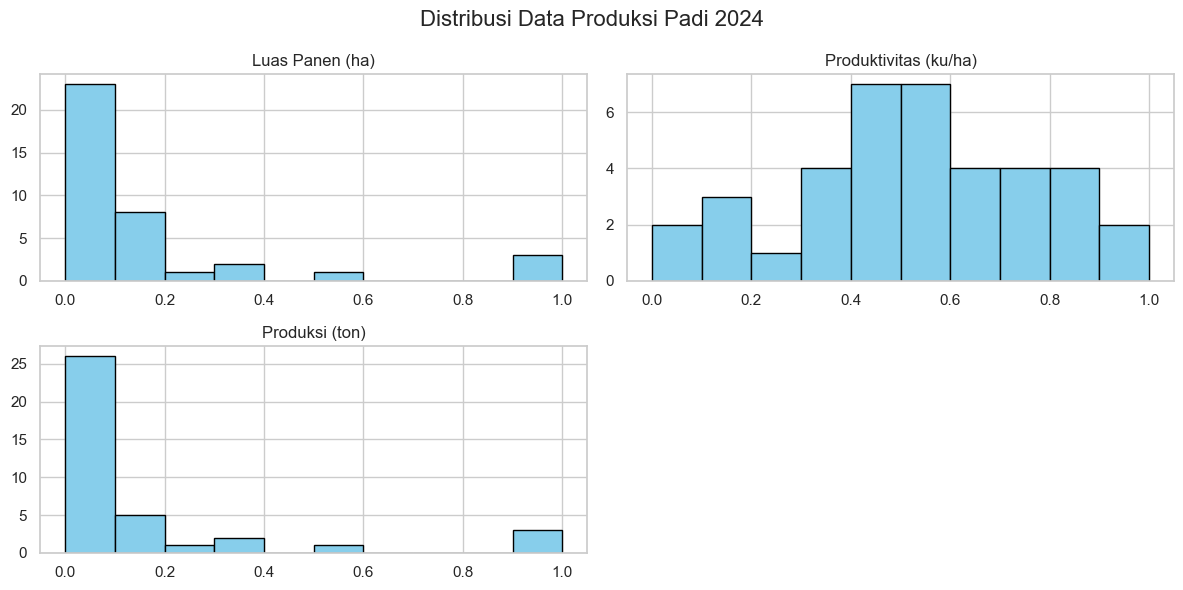

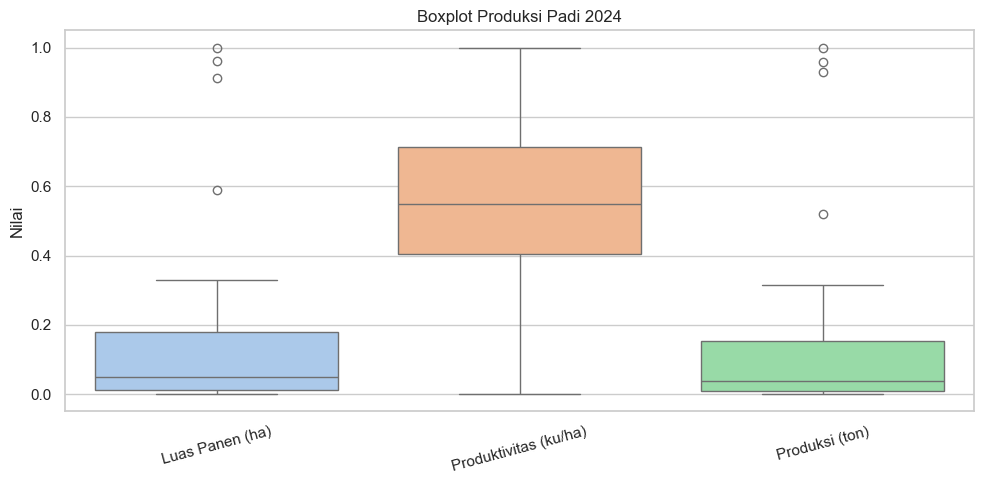

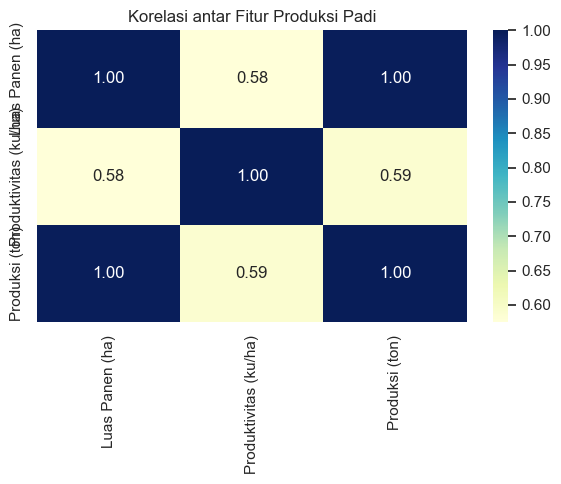

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numerik_df = df[['Luas Panen (ha)', 'Produktivitas (ku/ha)', 'Produksi (ton)']]

print("Statistik Data Produksi Padi 2024:")
print(numerik_df.describe())




numerik_df.hist(bins=10, figsize=(12, 6), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Data Produksi Padi 2024", fontsize=16)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
sns.boxplot(data=numerik_df, palette="pastel")
plt.title("Boxplot Produksi Padi 2024")
plt.ylabel("Nilai")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(numerik_df.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Korelasi antar Fitur Produksi Padi")
plt.tight_layout()
plt.show()


In [47]:
numerik_df = df[['Nama_Provinsi', 'Luas Panen (ha)', 'Produktivitas (ku/ha)', 'Produksi (ton)']]
outliers = {}
for col in ['Luas Panen (ha)', 'Produktivitas (ku/ha)', 'Produksi (ton)']:
    Q1 = numerik_df[col].quantile(0.25)
    Q3 = numerik_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_rows = numerik_df[(numerik_df[col] < lower_bound) | (numerik_df[col] > upper_bound)]
    outliers[col] = outlier_rows[['Nama_Provinsi', col]]
for feature, df_out in outliers.items():
    print(f"\n📌 Outlier untuk fitur: {feature}")
    if df_out.empty:
        print("Tidak ada outlier.")
    else:
        print(df_out.to_string(index=False))



📌 Outlier untuk fitur: Luas Panen (ha)
   Nama_Provinsi  Luas Panen (ha)
      JAWA BARAT         0.912415
     JAWA TENGAH         0.961528
      JAWA TIMUR         1.000000
SULAWESI SELATAN         0.588320

📌 Outlier untuk fitur: Produktivitas (ku/ha)
Tidak ada outlier.

📌 Outlier untuk fitur: Produksi (ton)
   Nama_Provinsi  Produksi (ton)
      JAWA BARAT        0.930579
     JAWA TENGAH        0.959102
      JAWA TIMUR        1.000000
SULAWESI SELATAN        0.519761


Model

In [38]:
import numpy as np
import random

random.seed(42)
np.random.seed(42)
data = df[['Luas Panen (ha)', 'Produktivitas (ku/ha)', 'Produksi (ton)']].values
k = 2
max_iter = 100
medoid_indices = random.sample(range(len(data)), k)
medoids = data[medoid_indices]

for iteration in range(max_iter):
    clusters = {i: [] for i in range(k)}
    for idx, point in enumerate(data):
        distances = [np.linalg.norm(point - medoid) for medoid in medoids]
        cluster_id = np.argmin(distances)
        clusters[cluster_id].append(idx)

    new_medoids = []
    for cluster_id, indices in clusters.items():
        cluster_points = data[indices]
        min_total_distance = float('inf')
        best_medoid = None
        for i in range(len(cluster_points)):
            candidate = cluster_points[i]
            total_distance = np.sum([np.linalg.norm(candidate - other) for other in cluster_points])
            if total_distance < min_total_distance:
                min_total_distance = total_distance
                best_medoid = candidate
        new_medoids.append(best_medoid)
    new_medoids = np.array(new_medoids)
    if np.allclose(medoids, new_medoids):
        print(f'Konvergen di iterasi ke-{iteration+1}')
        break
    medoids = new_medoids
labels = np.empty(len(data), dtype=int)
for cluster_id, indices in clusters.items():
    for i in indices:
        labels[i] = cluster_id
df['Cluster'] = labels
print(df[['Nama_Provinsi', 'Cluster']])


Konvergen di iterasi ke-3
           Nama_Provinsi  Cluster
1                   ACEH        1
2         SUMATERA UTARA        1
3         SUMATERA BARAT        1
4                   RIAU        1
5                  JAMBI        1
6       SUMATERA SELATAN        1
7               BENGKULU        1
8                LAMPUNG        1
9   KEP. BANGKA BELITUNG        1
10             KEP. RIAU        1
11           DKI JAKARTA        1
12            JAWA BARAT        0
13           JAWA TENGAH        0
14         DI YOGYAKARTA        1
15            JAWA TIMUR        0
16                BANTEN        1
17                  BALI        1
18   NUSA TENGGARA BARAT        1
19   NUSA TENGGARA TIMUR        1
20      KALIMANTAN BARAT        1
21     KALIMANTAN TENGAH        1
22    KALIMANTAN SELATAN        1
23      KALIMANTAN TIMUR        1
24      KALIMANTAN UTARA        1
25        SULAWESI UTARA        1
26       SULAWESI TENGAH        1
27      SULAWESI SELATAN        0
28     SULAWESI TENGGA

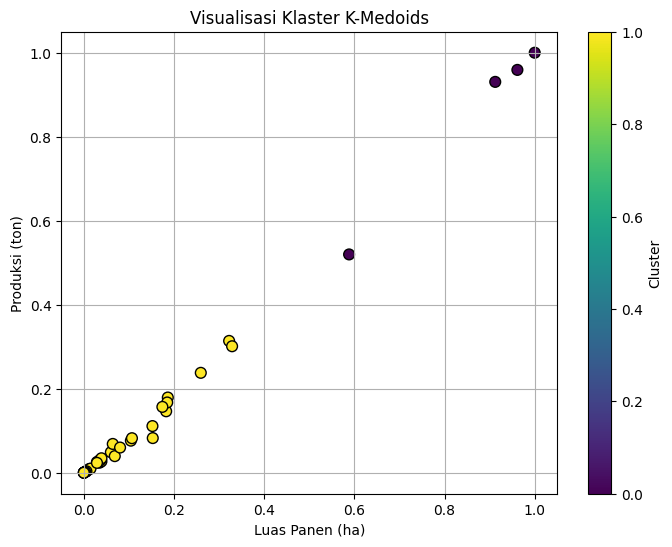

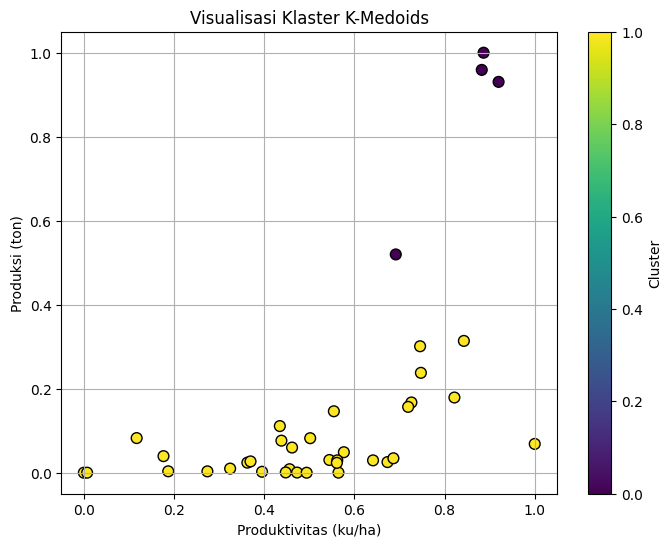

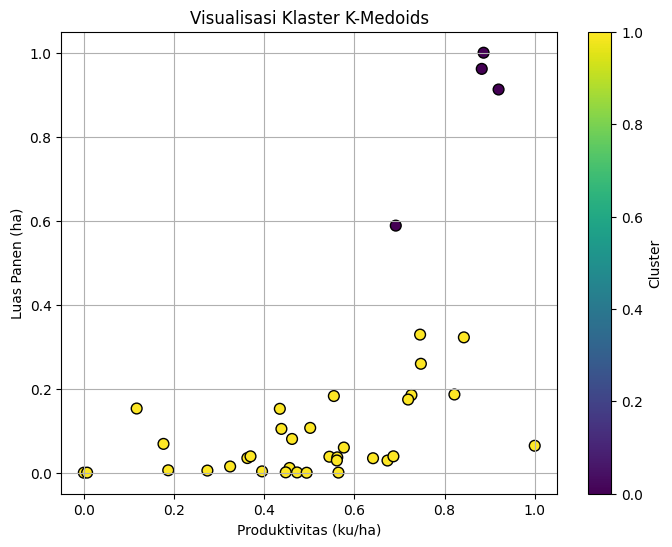

In [39]:
import matplotlib.pyplot as plt

x = df['Luas Panen (ha)']
y = df['Produksi (ton)']
labels = df['Cluster']
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x, y, c=labels, cmap='viridis', s=60, edgecolors='k')
plt.xlabel('Luas Panen (ha)')
plt.ylabel('Produksi (ton)')
plt.title('Visualisasi Klaster K-Medoids')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

x1 = df[ 'Produktivitas (ku/ha)']
y1 = df['Produksi (ton)']
labels = df['Cluster']
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x1, y1, c=labels, cmap='viridis', s=60, edgecolors='k')
plt.xlabel( 'Produktivitas (ku/ha)')
plt.ylabel('Produksi (ton)')
plt.title('Visualisasi Klaster K-Medoids')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

x3 = df['Produktivitas (ku/ha)']
y3 = df['Luas Panen (ha)']
labels = df['Cluster']
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x3, y3, c=labels, cmap='viridis', s=60, edgecolors='k')
plt.xlabel( 'Produktivitas (ku/ha)')
plt.ylabel('Luas Panen (ha)')
plt.title('Visualisasi Klaster K-Medoids')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [40]:
import numpy as np

n = len(data)
labels = np.array(labels)
unique_clusters = set(labels)
silhouette_scores = [[] for _ in unique_clusters]

for i in range(n):
    point_i = data[i]
    label_i = labels[i]


    same_cluster = [j for j in range(n) if labels[j] == label_i and j != i]
    if same_cluster:
        a_i = np.mean([np.linalg.norm(point_i - data[j]) for j in same_cluster])
    else:
        a_i = 0
    b_i_list = []
    for label_j in unique_clusters:
        if label_j == label_i:
            continue
        other_cluster = [j for j in range(n) if labels[j] == label_j]
        b = np.mean([np.linalg.norm(point_i - data[j]) for j in other_cluster])
        b_i_list.append(b)
    b_i = min(b_i_list) if b_i_list else 0
    if max(a_i, b_i) == 0:
        s_i = 0
    else:
        s_i = (b_i - a_i) / max(a_i, b_i)
    silhouette_scores[label_i].append(s_i)
for cluster_id, scores in enumerate(silhouette_scores):
    if scores:
        mean_score = np.mean(scores)
        print(f"Cluster {cluster_id}: Silhouette = {mean_score:.4f}, Jumlah Anggota = {len(scores)}")
    else:
        print(f"Cluster {cluster_id}: Tidak ada anggota (kosong)")


Cluster 0: Silhouette = 0.6464, Jumlah Anggota = 4
Cluster 1: Silhouette = 0.7208, Jumlah Anggota = 34
